In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved model
model = load_model('gender_classification_model.h5')

# Path to your test data directory
test_data_dir = 'dataset/test'  # Replace with your test data directory

# Prepare test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=32,  # Adjust batch size as needed
    class_mode='binary',
    shuffle=False  # Set to False if you want predictions to match filenames
)

# Perform predictions on test data
predictions = model.predict(test_generator)

# If you have ground truth labels, compute accuracy
ground_truth = test_generator.classes
accuracy = (predictions.argmax(axis=1) == ground_truth).mean()
print(f"Accuracy: {accuracy}")





Found 11 images belonging to 2 classes.
1/1 [==============================] - 0s 469ms/step
Accuracy: 0.45454545454545453


In [5]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
model = load_model('gender_classification_model.h5')

# Path to the image you want to classify
img_path = 'C:/Users/Rajat/Pictures/Pokemon Walpaper/1305158.jpeg'  # Replace with the path to your image

# Load and preprocess the image
img = image.load_img(img_path, target_size=(150, 150))  # Ensure the target_size matches the input size used during training
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Normalize the pixel values

# Predict the class probabilities for the image
predictions = model.predict(img_array)

# Interpret the predictions
if predictions[0][0] > 0.5:  # Use predictions[0][0] for binary classification
    print("Predicted: male")
else:
    print("Predicted: Female")


1/1 [==============================] - 0s 80ms/step
Predicted: male


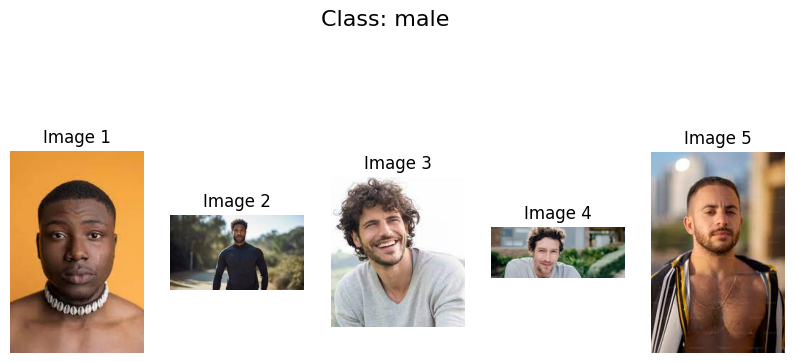

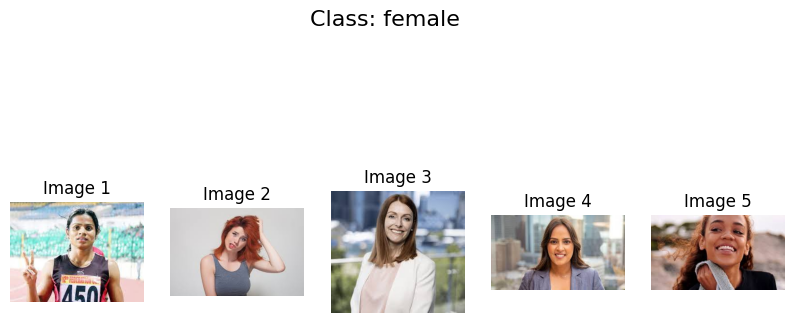

In [3]:
import matplotlib.pyplot as plt
import os

# Path to your dataset directory
dataset_dir = 'dataset/test/'  # Replace with your dataset directory

# Subdirectories for each class (e.g., 'male' and 'female')
classes = ['male', 'female']

# Visualize a few images from each class
num_images_per_class = 5  # Number of images to display per class

for class_name in classes:
    class_dir = os.path.join(dataset_dir, class_name)
    images = os.listdir(class_dir)[:num_images_per_class]

    plt.figure(figsize=(10, 5))
    plt.suptitle(f'Class: {class_name}', fontsize=16)
    for i, image_name in enumerate(images):
        image_path = os.path.join(class_dir, image_name)
        img = plt.imread(image_path)
        
        plt.subplot(1, num_images_per_class, i + 1)
        plt.imshow(img)
        plt.title(f'Image {i+1}')
        plt.axis('off')
    plt.show()
